# This notebook is meant to gather statistics and perform some analysis throughout the project

In [1]:
import os
import pandas as pd

Average sentences per article: 17.449


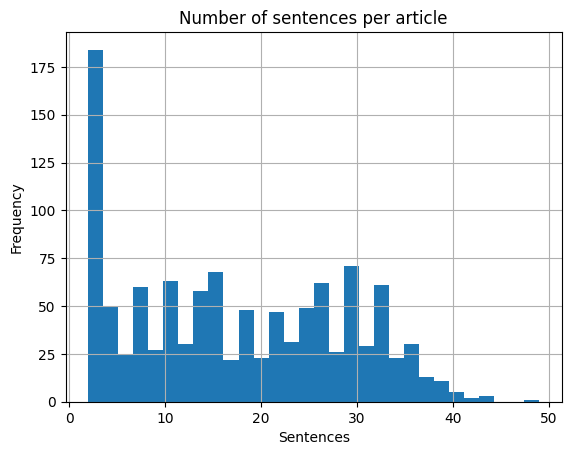

In [2]:
# Get the average number of sentences per article
data = pd.read_csv('Data/final_data_with_predictions_new.csv')
group = data.groupby(['URI']).count()

ax = group['Identifier'].hist(bins=30)
ax.set_title('Number of sentences per article')
ax.set_xlabel("Sentences")
ax.set_ylabel("Frequency")

print(f"Average sentences per article: {group['Identifier'].mean():.3f}")

Average articles per event: 15.393


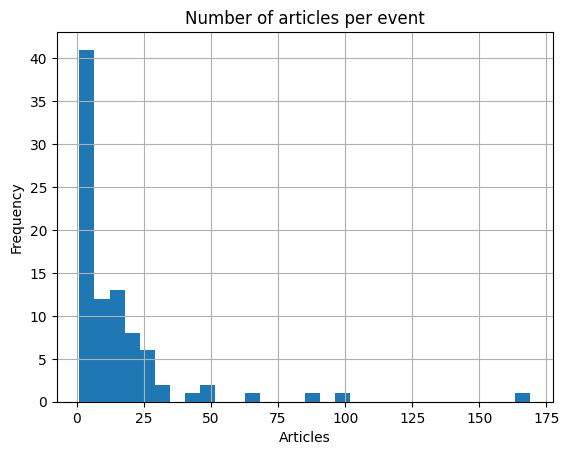

In [5]:
#Get the number of articles per event
data = pd.read_csv('Data/ASRAEL_data_full.csv')
group = data.groupby(['Event']).count()

ax = group['Identifier'].hist(bins=30)
ax.set_title('Number of articles per event')
ax.set_xlabel("Articles")
ax.set_ylabel("Frequency")

print(f"Average articles per event: {group['Identifier'].mean():.3f}")

In [11]:
#Get the largest events
group[group['URI'] > 27]

,URI,Identifier,Location,Time,Text
Event,,,,,
http://www.wikidata.org/entity/Q104705419,67,67,67,67,67
http://www.wikidata.org/entity/Q104717056,42,42,42,42,42
http://www.wikidata.org/entity/Q105046769,169,169,169,169,169
http://www.wikidata.org/entity/Q105137806,31,31,31,31,31
http://www.wikidata.org/entity/Q113453221,89,89,89,89,89
http://www.wikidata.org/entity/Q113482948,51,51,51,51,51
http://www.wikidata.org/entity/Q113503169,46,46,46,46,46
http://www.wikidata.org/entity/Q113568279,31,31,31,31,31
http://www.wikidata.org/entity/Q113612174,99,99,99,99,99


In [3]:
import pandas as pd

data = pd.read_csv('Data/ASRAEL_data_full.csv')
data[data['Event'] == 'http://www.wikidata.org/entity/Q113449657']

,URI,Identifier,Event,Location,Time,Text
987,http://asrael.eurecom.fr/news/e0fc169f-1776-32...,urn:newsml:afp.com:20220805T062718Z:TX-PAR-JPY...,http://www.wikidata.org/entity/Q113449657,Bangkok,2022-08-05T06:27:18Z,<nitf><body.content><p>Thailand's prime minist...
995,http://asrael.eurecom.fr/news/33f18665-5676-33...,urn:newsml:afp.com:20220805T102355Z:TX-PAR-JQC...,http://www.wikidata.org/entity/Q113449657,Sattahip,2022-08-05T10:23:55Z,<nitf><body.content><p>Thailand's prime minist...
1009,http://asrael.eurecom.fr/news/fc0cf32c-65d1-3a...,urn:newsml:afp.com:20220805T023156Z:TX-PAR-JPW...,http://www.wikidata.org/entity/Q113449657,Bangkok,2022-08-05T02:31:56Z,<nitf><body.content><p>A fire tore through a T...
1012,http://asrael.eurecom.fr/news/f2262ecd-bc82-36...,urn:newsml:afp.com:20220805T025139Z:TX-PAR-JPX...,http://www.wikidata.org/entity/Q113449657,Bangkok,2022-08-05T02:51:39Z,<nitf><body.content><p>A fire tore through a T...
1018,http://asrael.eurecom.fr/news/5d9667f9-f0bd-39...,urn:newsml:afp.com:20220805T094536Z:TX-PAR-JQB...,http://www.wikidata.org/entity/Q113449657,Sattahip,2022-08-05T09:45:36Z,<nitf><body.content><p>Thailand's prime minist...
1019,http://asrael.eurecom.fr/news/1fba45fc-b80a-33...,urn:newsml:afp.com:20220805T021522Z:TX-PAR-JPW...,http://www.wikidata.org/entity/Q113449657,Bangkok,2022-08-05T02:15:22Z,<nitf><body.content><p>A fire tore through a T...
1025,http://asrael.eurecom.fr/news/3328cee8-8e80-32...,urn:newsml:afp.com:20220806T100224Z:TX-PAR-JQT...,http://www.wikidata.org/entity/Q113449657,Bangkok,2022-08-06T10:02:24Z,<nitf><body.content><p>The death toll from a m...
1076,http://asrael.eurecom.fr/news/14a190f2-8fdf-35...,urn:newsml:afp.com:20220807T052504Z:TX-PAR-JRF...,http://www.wikidata.org/entity/Q113449657,Bangkok,2022-08-07T05:25:04Z,<nitf><body.content><p>Thai police have detain...


In [ ]:
# This is used for evaluating the coreference model
import ast
from resources import node_creation
import pandas as pd

data = pd.read_csv('Data/final_data_with_predictions_new.csv') #Load the original dataset
with open('Data/cluster_data/event_clusters_0.85.txt') as f: #Open the generated cluster file
    cluster_doc = f.readlines()

with open('Data/cluster_data/cluster_0.85_processed.txt', 'w') as output_file:

    for cluster in cluster_doc:
        if cluster.startswith('c'):
            output_file.write(f'{cluster}\n')
            print(cluster)

        if cluster.startswith('['):
            cluster = ast.literal_eval(cluster)

            for mention in cluster:
                mention = mention.split('_')

                sentence = data[(data['URI'] == mention[1]) & (data['Sentence_num'] == int(mention[2]))]['Sentence'].values[0]
                sentence_uri = node_creation('', sentence, base_add='/sentence') #Generate the URI for the sentence

                output_file.write(f"{mention[0]} - {sentence}\n")
                print(f"{mention[0]} - {sentence}\n")

            output_file.write('\n\n')
            print('\n')
output_file.close()

In [11]:
# This is used for evaluating the coreference model
import ast
from resources import node_creation
import pandas as pd

data = pd.read_csv('Data/final_data_with_predictions_new.csv') #Load the original dataset
with open('Data/cluster_data/event_clusters_0.85.txt') as f: #Open the generated cluster file
    cluster_doc = f.readlines()

for cluster in cluster_doc:
    if cluster.startswith('c'):
        print(cluster)

    if cluster.startswith('['):
        cluster = ast.literal_eval(cluster)

        for mention in cluster:
            mention = mention.split('_')

            sentence = data[(data['URI'] == mention[1]) & (data['Sentence_num'] == int(mention[2]))]['Sentence'].values[0]
            sentence_uri = node_creation('', sentence, base_add='/sentence') #Generate the URI for the sentence

            if data[(data['URI'] == mention[1]) & (data['Sentence_num'] == int(mention[2]))]['Subject'].values[0] == mention[0]:
                print("this is a Subject!")

            else:
                print("this is an object")

            print(f"{mention[0]} - {sentence}\n")

        print('\n')

cluster #1

this is an object
confirmed - Thai police have detained the owner of a nightclub in connection with a fire at the venue that killed 15 people, officers confirmed Sunday.



cluster #2

this is a Subject!
issued - A senior police officer in Chonburi province confirmed Sunday that club owner Pongsiri Panprasng had turned himself in after an arrest warrant was issued.



cluster #3

this is an object
confirmed - A senior police officer in Chonburi province confirmed Sunday that club owner Pongsiri Panprasng had turned himself in after an arrest warrant was issued.



cluster #4

this is a Subject!
authorisation - "He remains under detention and police will seek the court's authorisation Monday to detain him while we are investigating," he told AFP.



cluster #5

this is a Subject!
recklessness - The 27-year-old will face several charges, the police officer said, including causing death through recklessness and operating a pub without a licence.



cluster #6

this is an objec

# Get statistics about the made clusters

In [13]:
import pandas as pd
from collections import defaultdict
import os
import ast
from collections import Counter
import numpy as np

def def_value():
    return 0

length_clusters=defaultdict(def_value)
length_clusters_list = []
length_clusters_list_normalized = []
total_clusters = 0
total_single_clusters = 0
total_similarities = []
count_mentions = Counter() #To see which mentions are the most frequent
unique_mentions = []


base_path = 'Data/cluster_data/output_all/'
cluster_dirs = os.listdir(base_path)
cluster_docs = [base_path + dir +'/event_clusters.txt' for dir in cluster_dirs if os.path.isdir(base_path + dir)]


for doc in cluster_docs:

    with open(doc) as f: #Open the generated cluster file
        cluster_doc = f.readlines()

    num_mentions_in_doc = 0

    for cluster in cluster_doc:

        if cluster.startswith('['):

            total_clusters +=1

            cluster = ast.literal_eval(cluster)

            len_cluster = len(cluster)
            num_mentions_in_doc += len_cluster
            length_clusters[len_cluster] = length_clusters[len_cluster] + 1
            length_clusters_list.append(len_cluster)

            '''
            if len_cluster > 50: #Print largest clusters
                print(f"{doc}: length: {len_cluster}")

            '''
            if len_cluster == 1:
                total_single_clusters +=1

            [unique_mentions.append(mention) for mention in cluster]

            word_list = [mention.split('_')[0] for mention in cluster]
            count_mentions.update(word_list)


            if len_cluster != 1: #Skip single clusters
                # count syntactic matches

                counts = Counter(word_list)
                similarity = counts.most_common(1)[0][1]/sum(counts.values())
                total_similarities.append(similarity)


    for cluster in cluster_doc:
        normalized_value = len_cluster/num_mentions_in_doc
        length_clusters_list_normalized.append(normalized_value)
        if normalized_value > 0.125:
            print(doc)

print("\n")
print(f"Total number of mentions: {sum(count_mentions.values())}")
print(f"Total number of unique mentions: {len(np.unique(unique_mentions))}")
print(f"Total number of clusters: {total_clusters}")
print(f"Total number of single clusters: {total_single_clusters}")

Data/cluster_data/output_all/Q105063804_dataset/event_clusters.txt
Data/cluster_data/output_all/Q105063804_dataset/event_clusters.txt
Data/cluster_data/output_all/Q105063804_dataset/event_clusters.txt
Data/cluster_data/output_all/Q105063804_dataset/event_clusters.txt
Data/cluster_data/output_all/Q105063804_dataset/event_clusters.txt
Data/cluster_data/output_all/Q105063804_dataset/event_clusters.txt
Data/cluster_data/output_all/Q105063804_dataset/event_clusters.txt
Data/cluster_data/output_all/Q105063804_dataset/event_clusters.txt
Data/cluster_data/output_all/Q105063804_dataset/event_clusters.txt
Data/cluster_data/output_all/Q105063804_dataset/event_clusters.txt
Data/cluster_data/output_all/Q105063804_dataset/event_clusters.txt
Data/cluster_data/output_all/Q105063804_dataset/event_clusters.txt
Data/cluster_data/output_all/Q105063804_dataset/event_clusters.txt
Data/cluster_data/output_all/Q105063804_dataset/event_clusters.txt
Data/cluster_data/output_all/Q105063804_dataset/event_clusters

In [3]:
#Print most common extracted matches
count_mentions.most_common(5)

[('vote', 305), ('killed', 279), ('said', 215), ('results', 182), ('end', 168)]

In [4]:
pd.Series(length_clusters_list).describe()

count    28355.000000
mean         1.588115
std          2.431343
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        145.000000
dtype: float64

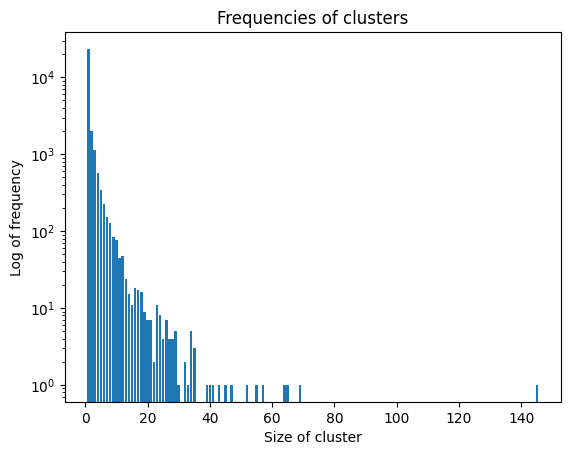

In [14]:
import matplotlib.pyplot as plt

plt.bar(list(length_clusters.keys()), length_clusters.values(), log=True)
plt.xlabel("Size of cluster")
plt.ylabel("Log of frequency")
plt.title("Frequencies of clusters")
plt.savefig("Plots/Freq_cluster_size.png")
plt.show()

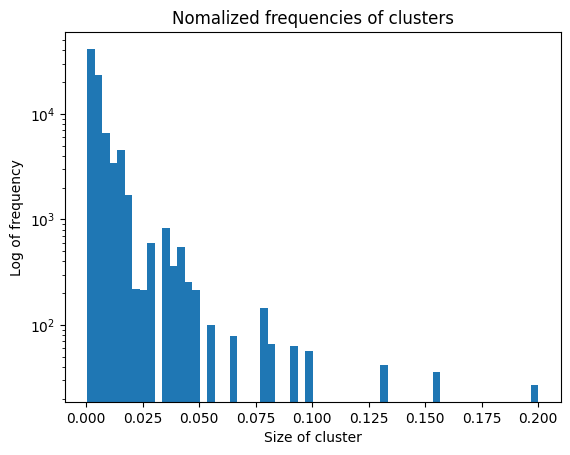

In [15]:
#Normalized by the number of mentions within a document
plt.hist(length_clusters_list_normalized, bins=60, log=True)
plt.xlabel("Size of cluster")
plt.ylabel("Log of frequency")
plt.title("Nomalized frequencies of clusters")
plt.savefig("Plots/norm_freq_cluster_size.png")
plt.show()

In [13]:
print(f"Exact syntactic matches: {(sum(total_similarities) / len(total_similarities)):.3f}")

Exact syntactic matches: 0.951


In [2]:
# Load the graph, and find an example event with the 4W
from rdflib import Graph

graph = Graph()
graph.parse('Data/graphs/event_article_graph_complete_merged.ttl')


<Graph identifier=Nc5580432e76d44d981c478bcbd4f2a55 (<class 'rdflib.graph.Graph'>)>

In [3]:
# Get an event that has all 4W's
query = """
SELECT DISTINCT ?a
WHERE {
    ?a a ns1:Event .
    ?a ns1:hasActor ?actor .
    ?a ns1:hasPlace ?place .
    ?a ns1:hasTime ?time
}"""

qres = graph.query(query, initNs={"ns1": "http://semanticweb.cs.vu.nl/2009/11/sem/"})
for row in qres:
    print(f"{row}")

(rdflib.term.URIRef('http://www.wikidata.org/entity/Q102850603'),)
(rdflib.term.URIRef('http://www.wikidata.org/entity/Q55632583'),)
(rdflib.term.URIRef('http://www.wikidata.org/entity/Q113531252'),)
(rdflib.term.URIRef('http://www.wikidata.org/entity/Q113630530'),)
(rdflib.term.URIRef('http://www.wikidata.org/entity/Q87920134'),)
(rdflib.term.URIRef('http://www.wikidata.org/entity/Q105612975'),)
(rdflib.term.URIRef('http://www.wikidata.org/entity/Q96016136'),)
(rdflib.term.URIRef('http://www.wikidata.org/entity/Q105008734'),)
(rdflib.term.URIRef('http://www.wikidata.org/entity/Q105082586'),)
(rdflib.term.URIRef('http://www.wikidata.org/entity/Q105137806'),)
(rdflib.term.URIRef('http://www.wikidata.org/entity/Q104705419'),)
(rdflib.term.URIRef('http://www.wikidata.org/entity/Q113453221'),)


In [ ]:
#Statistics about the number of predicates a node has

g = Graph()
g.parse("Data/graphs/event_article_graph_complete.ttl")

query = """
PREFIX sem: <http://semanticweb.cs.vu.nl/2009/11/sem/>
SELECT ?URI ?
WHERE {
    ?s a sem:Event;
        ?p ?o
}"""

qres = g.query(query)
for row in qres:
    print(f"num_pred: {row.num_predicates} - num_events: {row.num_events}: on average: {int(row.num_predicates) / int(row.num_events)}")

query = """
PREFIX sem: <http://semanticweb.cs.vu.nl/2009/11/sem/>
PREFIX rnews: <http://iptc.org/std/rNews/2011-10-07#>
SELECT (COUNT(?p) as ?num_predicates) (COUNT(DISTINCT ?s) as ?num_articles)
WHERE {
    ?s a rnews:Article;
        ?p ?o
}"""

qres = g.query(query)
for row in qres:
    print(f"num_pred: {row.num_predicates} - num_article: {row.num_articles}: on average: {int(row.num_predicates) / int(row.num_articles)}")

In [1]:
# Use rebel (Relationship extraction) to predict on the evaluation and test set.
from rebel_finetuning_faro import make_predictions
import pandas as pd

val_data = pd.read_csv('Data/rebel_v2/data/new_split/val.csv')
test_data = pd.read_csv('Data/rebel_v2/data/new_split/test.csv')

val_preds = make_predictions(val_data['sentence'].to_list(), 'rebel_finetuned.pth')
test_preds = make_predictions(test_data['sentence'].to_list(), 'rebel_finetuned.pth')
val_preds = pd.DataFrame(val_preds[1], columns=['pred_subject', 'pred_relation', 'pred_object'])
test_preds = pd.DataFrame(test_preds[1], columns=['pred_subject', 'pred_relation', 'pred_object'])

val_data = pd.concat([val_data, val_preds], axis=1)
test_data = pd.concat([test_data, test_preds], axis=1)
val_data.drop(columns=val_data.columns[0], axis=1, inplace=True)
test_data.drop(columns=test_data.columns[0], axis=1, inplace=True)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mike-\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


C:\Users\mike-\Documents\VU\Eurecom\KG_mapping\venv\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\mike-\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


C:\Users\mike-\Documents\VU\Eurecom\KG_mapping\venv\lib\site-packages\transformers\generation\utils.py:1313: UserWarning: Using `max_length`'s default (200) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [2]:
val_preds = pd.DataFrame(val_preds[1], columns=['pred_subject', 'pred_relation', 'pred_object'])
test_preds = pd.DataFrame(test_preds[1], columns=['pred_subject', 'pred_relation', 'pred_object'])

KeyError: 1

In [ ]:
val_data = pd.concat([val_data, val_preds], axis=1)
test_data = pd.concat([test_data, test_preds], axis=1)

In [ ]:
val_data.drop(columns=val_data.columns[0], axis=1, inplace=True)
test_data.drop(columns=test_data.columns[0], axis=1, inplace=True)

In [29]:
for i, row in val_data.iterrows():
    if row['label'] == 'cause' and row['pred_relation'] != 'cause':
        print(f"{row['sentence']}\nTrue: {row['trigger1']} - {row['label']} - {row['trigger2']}\nPred: {row['pred_subject']} - {row['pred_relation']} - {row['pred_object']}\n")

Analysts noted that over the past 20 years, Mr. Fournier has built his company through astute stock-market activity and has warded off at least three takeover attempts. 
True: activity - cause - built
Pred: activity - prevent - takeover



In [30]:
for i, row in test_data.iterrows():
    if row['label'] == 'cause' and row['pred_relation'] != 'cause':
        print(f"{row['sentence']}\nTrue: {row['trigger1']} - {row['label']} - {row['trigger2']}\nPred: {row['pred_subject']} - {row['pred_relation']} - {row['pred_object']}\n")

In [4]:
from rebel_finetuning_faro import re_score
val_pred_triples = []
val_gt_triples = []
for i, row in val_data.iterrows():

    val_pred_triples.append((row['pred_subject'], row['pred_relation'], row['pred_object']))
    val_gt_triples.append((row['trigger1'], row['label'], row['trigger2']))

test_pred_triples = []
test_gt_triples = []
for i, row in test_data.iterrows():

    test_pred_triples.append((row['pred_subject'], row['pred_relation'], row['pred_object']))
    test_gt_triples.append((row['trigger1'], row['label'], row['trigger2']))

print("Validation:")
scores, precision, recall, f1 = re_score(val_pred_triples, val_gt_triples, 'relation')
scores, precision, recall, f1 = re_score(val_pred_triples, val_gt_triples, 'subject')
scores, precision, recall, f1 = re_score(val_pred_triples, val_gt_triples, 'object')
print("\nTest:")
scores, precision, recall, f1 = re_score(test_pred_triples, test_gt_triples, 'relation')
scores, precision, recall, f1 = re_score(test_pred_triples, test_gt_triples, 'subject')
scores, precision, recall, f1 = re_score(test_pred_triples, test_gt_triples, 'object')

Validation:
processed 201 sentences with 201 entities; found: 201 relations; correct: 189.
	ALL	 TP: 189;	FP: 12;	FN: 12
		(m avg): precision: 94.03;	recall: 94.03;	f1: 94.03 (micro)
		(M avg): precision: 92.15;	recall: 94.32;	f1: 92.96 (Macro)

	cause: 	TP: 24;	FP: 7;	FN: 1;	precision: 77.42;	recall: 96.00;	f1: 85.71;	31
	enable: 	TP: 52;	FP: 2;	FN: 3;	precision: 96.30;	recall: 94.55;	f1: 95.41;	54
	prevent: 	TP: 55;	FP: 1;	FN: 5;	precision: 98.21;	recall: 91.67;	f1: 94.83;	56
	intend: 	TP: 58;	FP: 2;	FN: 3;	precision: 96.67;	recall: 95.08;	f1: 95.87;	60
Macro F1 for subject: 45.4002
Micro F1 for subject: 66.6667
Macro F1 for object: 45.2155
Micro F1 for object: 66.4773

Test:
processed 95 sentences with 95 entities; found: 95 relations; correct: 81.
	ALL	 TP: 81;	FP: 13;	FN: 14
		(m avg): precision: 86.17;	recall: 85.26;	f1: 85.71 (micro)
		(M avg): precision: 86.82;	recall: 79.13;	f1: 82.12 (Macro)

	cause: 	TP: 46;	FP: 8;	FN: 0;	precision: 85.19;	recall: 100.00;	f1: 92.00;	54
	enab

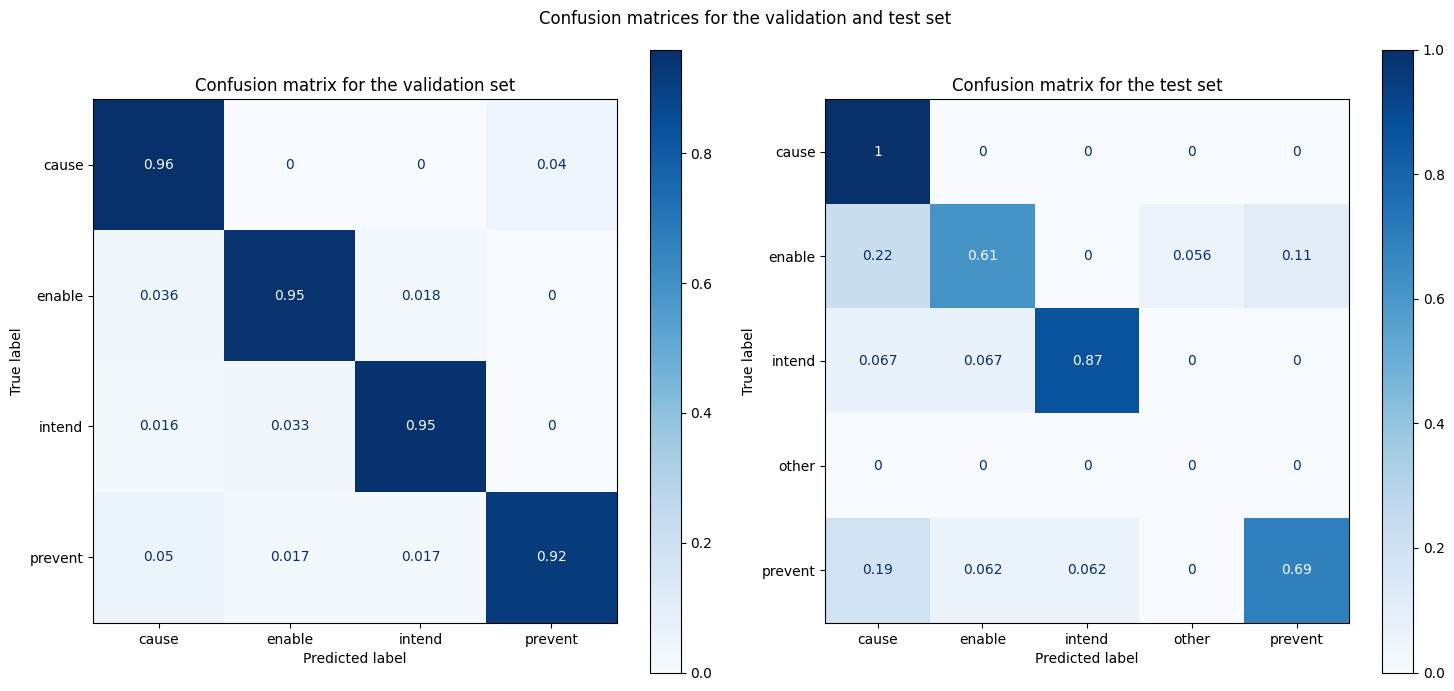

In [121]:
#Generate confusion matrixes
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

actual = [act[1] for act in val_gt_triples]
predicted = [pred[1] for pred in val_pred_triples]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,7))
confusion_matrix = metrics.confusion_matrix(actual, predicted, normalize="true")
labels = np.unique(actual + predicted ).tolist()
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = labels)
cm_display.plot(cmap = 'Blues', ax=ax1)
ax1.set_title("Confusion matrix for the validation set")

actual = [act[1] for act in test_gt_triples]
predicted = [pred[1] if (pred[1] in labels) else 'other' for pred in test_pred_triples]

confusion_matrix = metrics.confusion_matrix(actual, predicted, normalize='true')
labels = np.unique(actual + predicted).tolist()
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = labels)
cm_display.plot(cmap = 'Blues', ax=ax2)
ax2.set_title("Confusion matrix for the test set")
plt.suptitle("Confusion matrices for the validation and test set")
plt.tight_layout()
plt.savefig('Plots/Confusion_matrix.png')
plt.show()

In [7]:
# Are the subject and object in the data relatively unique?
import pandas as pd

test_data = pd.read_csv('Data/rebel_v2/data/new_split/test.csv')
test_data['trigger2'].value_counts()

reduce       6
reap         2
lost         2
recycling    2
brake        2
            ..
famine       1
banned       1
wonder       1
bid          1
carry        1
Name: trigger2, Length: 82, dtype: int64

In [5]:
# See what relations are present in the REBEL dataset
from datasets import load_dataset
import pandas as pd
from rebel_finetuning_faro import extract_triplets

dataset = load_dataset("Babelscape/rebel-dataset")
extracted = extract_triplets(dataset['train']['triplets'], gold_extraction=True)
data = pd.DataFrame(extracted, columns=['Subject', 'Relation', 'Object'])
rebel_relations = data['Relation'].value_counts()

relations = ['caus', 'enabl', 'inten', 'prevent'] #This is on purpose, so the part is already matched
length_data = len(data)
for index, values in rebel_relations.iteritems():
    for rel in relations:
        if rel in index:
            print(f"{index}\t num: {values}\t proportion: {values/length_data}")

has cause	 num: 1584	 proportion: 0.00019229524895982716
cause of death	 num: 194	 proportion: 2.3551312056948528e-05
cause of destruction	 num: 55	 proportion: 6.676918366660666e-06
has immediate cause	 num: 14	 proportion: 1.6995792206045331e-06
intended public	 num: 12	 proportion: 1.4567821890895998e-06
immediate cause of	 num: 9	 proportion: 1.0925866418171999e-06
end cause	 num: 3	 proportion: 3.6419554727239996e-07
may prevent	 num: 2	 proportion: 2.427970315149333e-07
maintenance method	 num: 1	 proportion: 1.2139851575746665e-07


C:\Users\mike-\AppData\Local\Temp\ipykernel_18932\3985425299.py:13: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, values in rebel_relations.iteritems():


In [1]:
#See what relations are present in WebNLG
from datasets import load_dataset
import pandas as pd
dataset = load_dataset("web_nlg", "release_v1")

Generating full split:   0%|          | 0/14237 [00:00<?, ? examples/s]

Dataset web_nlg downloaded and prepared to C:/Users/mike-/.cache/huggingface/datasets/web_nlg/release_v1/0.0.0/28ffb892f7f42450dd9558684aa43bcaf44b1b3bf0d77cb8d73534646af88dda. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [26]:
dataset['full']['modified_triple_sets'][0]['mtriple_set'][0][0].split('|')[1].strip()

'leaderName'

In [28]:
relations = []
for instance in dataset['full']['modified_triple_sets']:
    relations.append(instance['mtriple_set'][0][0].split('|')[1].strip())

In [31]:
rel_counts = pd.value_counts(relations)
relations = ['caus', 'enabl', 'inten', 'prevent'] #This is on purpose, so the part is already matched

for index, values in rel_counts.iteritems():
    for rel in relations:
        if rel in index:
            print(f"{index}\t {values}")

C:\Users\mike-\AppData\Local\Temp\ipykernel_14224\1392897734.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, values in rel_counts.iteritems():


In [32]:
rel_counts

country              1087
location              945
isPartOf              584
club                  500
genre                 438
                     ... 
runwaySurfaceType       1
child                   1
lastAired               1
firstAired              1
modelYears              1
Length: 368, dtype: int64

C:\Users\mike-\AppData\Local\Temp\ipykernel_26376\3638457967.py:48: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string " " (-> linestyle=' '). The keyword argument will take precedence.
  plt.plot([], [], ' ', label="Combined data", color='black', linestyle='dashed')


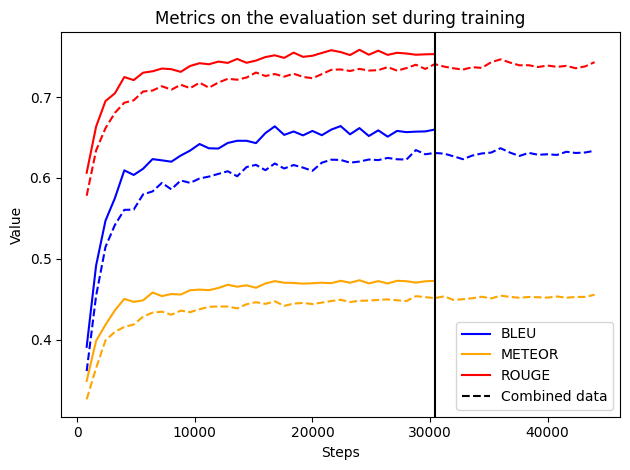

In [40]:
# Plot evaluation scores during training jointGT
import matplotlib.pyplot as plt
PATH_TO_BASE_LOG = r'Data/jointGT/logs_jointGT/nohup.txt' #Path to the base version of jointGT
PATH_TO_COMBINED_LOG = r'Data/jointGT/logs_jointGT/nohup_combined.txt' #Path to the base version of jointGT

EVAL_STEPS = 800 #The number of steps after which evaluation is done

base_log_metrics ={"BLEU": [], 'METEOR': [], 'ROUGE': []}
combined_log_metrics ={"BLEU": [], 'METEOR': [], 'ROUGE': []}

with open(PATH_TO_BASE_LOG, 'r', encoding="utf-8") as base_log:
    base_log_text = base_log.readlines()
    base_log.close()

with open(PATH_TO_COMBINED_LOG, 'r', encoding="utf-8") as combined_log:
    combined_log_text = combined_log.readlines()
    combined_log.close()

for line in base_log_text:
    if line.startswith("Bleu_4:"):
        base_log_metrics['BLEU'].append(float(line.split()[1]))

    if line.startswith("METEOR:"):
        base_log_metrics['METEOR'].append(float(line.split()[1]))

    if line.startswith("ROUGE_L:"):
        base_log_metrics['ROUGE'].append(float(line.split()[1]))

for line in combined_log_text:
    if line.startswith("Bleu_4:"):
        combined_log_metrics['BLEU'].append(float(line.split()[1]))

    if line.startswith("METEOR:"):
        combined_log_metrics['METEOR'].append(float(line.split()[1]))

    if line.startswith("ROUGE_L:"):
        combined_log_metrics['ROUGE'].append(float(line.split()[1]))

base_log_metrics['Steps'] = list(range(800, (EVAL_STEPS*len(base_log_metrics['BLEU']))+1, EVAL_STEPS)) #Generate the steps by accumulating
combined_log_metrics['Steps'] = list(range(800, (EVAL_STEPS*len(combined_log_metrics['BLEU']))+1, EVAL_STEPS)) #Generate the steps by accumulating

plt.plot(base_log_metrics['Steps'], base_log_metrics['BLEU'], label = "BLEU", color="blue")
plt.plot(base_log_metrics['Steps'], base_log_metrics['METEOR'], label = "METEOR", color="orange")
plt.plot(base_log_metrics['Steps'], base_log_metrics['ROUGE'], label = "ROUGE", color="red")
plt.plot(combined_log_metrics['Steps'], combined_log_metrics['BLEU'], color="blue", linestyle='dashed')
plt.plot(combined_log_metrics['Steps'], combined_log_metrics['METEOR'], color="orange", linestyle='dashed')
plt.plot(combined_log_metrics['Steps'], combined_log_metrics['ROUGE'], color="red", linestyle='dashed')
plt.plot([], [], ' ', label="Combined data", color='black', linestyle='dashed')
plt.axvline(x = max(base_log_metrics['Steps']), color = 'black', linestyle = '-')

plt.legend()
plt.xlabel("Steps")
plt.ylabel("Value")
plt.title("Metrics on the evaluation set during training")
plt.tight_layout()
plt.savefig("Plots/jointGT_training.png")
plt.show()

In [50]:
#Get the metrics for the best evaluation

best_index = base_log_metrics['BLEU'].index(max(base_log_metrics['BLEU']))
print("For the base training the best model gives:")
for key in base_log_metrics:
    print(f"{key}\t{base_log_metrics[key][best_index]}")

best_index = combined_log_metrics['BLEU'].index(max(combined_log_metrics['BLEU']))
print("\nFor the combined training the best model gives:")
for key in combined_log_metrics:
    print(f"{key}\t{combined_log_metrics[key][best_index]}")

For the base training the best model gives:
BLEU	0.6642
METEOR	0.4727
ROUGE	0.7558
Steps	22400

For the combined training the best model gives:
BLEU	0.6368
METEOR	0.4543
ROUGE	0.7468
Steps	36000


In [1]:
# Qualitative analysis on jointGT output
# Load the json file of the dataset and the model output and compare

import json
import random
random.seed(0)

#First print the size of the webnlg and crafted dataset
dataset_names = ['train.json', 'val.json', 'test.json']

for dataset in dataset_names:

    faro_dataset = json.load(open(f'Data\\jointGT\\faro\\relation_dataset_jointgt_{dataset}'))
    webnlg = json.load(open(f'..\\JointGT\\JointGT_data\\data\\webnlg\\{dataset}'))

    print(f"{dataset}: FARO: {len(faro_dataset)}\t WebNLG: {len(webnlg)}")

train.json: FARO: 1800	 WebNLG: 12876
val.json: FARO: 201	 WebNLG: 1619
test.json: FARO: 95	 WebNLG: 1600


In [2]:
#The combined model on the FARO testset
sample_faro = random.sample(range(0, len(faro_dataset)), 5)
with open('Data/jointGT/output/FARO_test_combined_preds.txt', 'r') as file:
    output = file.readlines()
    file.close()

output = [output[index] for index in sample_faro]
faro_dataset = [faro_dataset[index] for index in sample_faro]

for input, output_instance in zip(faro_dataset, output) :
    print(input['kbs'])
    print(f"{input['text']}\n")
    print(output_instance)

{'W18058': ['benefited', 'benefited', [['cause', 'demand']]]}
['The company benefited from continued strong demand and higher selling prices for titanium dioxide, a white pigment used in paints, paper and plastics.    ']

The company said it benefited from the strong demand for its products and services from a growing number of customers.

{'W17844': ['innovation', 'innovation', [['enable', 'center']]]}
['We recently moved our headquarters and research and development center to Abu Dhabi to benefit from its rapidly growing innovation hub, and with the new AWS Region, we are excited to see it thrive at an accelerated rate."']

The United States has created a new innovation center that will help stimulate economic growth and job creation.

{'W18030': ['eaten', 'eaten', [['cause', 'made']]]}
['"Cheerios and Honey Nut Cheerios have eaten away sales normally going to Kellogg\'s corn-based lines simply because they are made of oats," says Merrill Lynch food analyst William Maguire. ']

The c

In [3]:
#The base model on the FARO testset using same sample as above
with open('Data/jointGT/output/FARO_test_normal_preds.txt', 'r') as file:
    output = file.readlines()
    file.close()

output = [output[index] for index in sample_faro]

for input, output_instance in zip(faro_dataset, output) :
    print(input['kbs'])
    print(f"{input['text']}\n")
    print(output_instance)

{'W18058': ['benefited', 'benefited', [['cause', 'demand']]]}
['The company benefited from continued strong demand and higher selling prices for titanium dioxide, a white pigment used in paints, paper and plastics.    ']

benefited '' is the cause of the demand .

{'W17844': ['innovation', 'innovation', [['enable', 'center']]]}
['We recently moved our headquarters and research and development center to Abu Dhabi to benefit from its rapidly growing innovation hub, and with the new AWS Region, we are excited to see it thrive at an accelerated rate."']

Innovation is the enabler of the center .

{'W18030': ['eaten', 'eaten', [['cause', 'made']]]}
['"Cheerios and Honey Nut Cheerios have eaten away sales normally going to Kellogg\'s corn-based lines simply because they are made of oats," says Merrill Lynch food analyst William Maguire. ']

The cause of eating is eaten .

{'W17625': ['reimburse', 'reimburse', [['cause', 'offer']]]}
['The directors said if Messrs. Drabinsky and Gottlieb mail 

In [4]:
#The base model on the base testset
sample_webnlg = random.sample(range(0, len(webnlg)), 5)

with open('Data/jointGT/output/output_base_baseTestset.txt', 'r') as file:
    output = file.readlines()
    file.close()

output = [output[index] for index in sample_webnlg]
webnlg = [webnlg[index] for index in sample_webnlg]

for input, output_instance in zip(webnlg, output) :
    print(input['kbs'])
    print(f"{input['text']}\n")
    print(output_instance)

{'W1750': ['523329000.0 (kilometres)', '523329000.0 (kilometres)', [['apoapsis', '109 Felicitas']]], 'W1123': ['170.0 (kelvins)', '170.0 (kelvins)', [['temperature', '109 Felicitas']]]}
['109 Felicitas , with a temperature of 170 kelvins , has an apoapsis of 523329000.0 ( kilometres ) .', 'The temperature of the asteroid called 109 Felicitas is 170.0 kelvins and it has an apoapsis of 523329000.0 km .', 'The temperature of the asteroid called 109 Felicitas is 170.0 kelvins and it has an apoapsis of 523329000 kilometres .']

109 Felicitas has an apoapsis of 523329000.0 kilometres and a temperature of 170.0 kelvins .

{'W2455': ['Live Nation Entertainment', 'Live Nation Entertainment', [['owner', '3Arena']]], 'W1802': ['Republic of Ireland', 'Republic of Ireland', [['is part of', 'Dublin']]], 'W606': ['Dublin', 'Dublin', [['location', '3Arena']]], 'W838': ['Leinster', 'Leinster', [['is part of', 'Dublin']]]}
['The owner of 3Arena , Dublin , Leinster , Republic of Ireland is Live Nation En

In [3]:
#Load the FARO trainingsset, and check how often the words 'the company' 'the united nations' and 'the united states' occur
import json
import nltk

faro_dataset = json.load(open(f'Data\\jointGT\\faro\\relation_dataset_jointgt_train.json'))
sentences = [instance['text'][0] for instance in faro_dataset]
frequency_bigrams = nltk.FreqDist()
frequency_threegrams = nltk.FreqDist()
frequency_fourgrams = nltk.FreqDist()

for sentence in sentences:
    bigrams = nltk.bigrams(sentence.split())
    frequency_bigrams.update(bigrams)
    three_grams = nltk.ngrams(sentence.split(), 3)
    frequency_threegrams.update(three_grams)
    four_grams = nltk.ngrams(sentence.split(), 4)
    frequency_fourgrams.update(four_grams)

In [19]:
frequency_bigrams.most_common(20)

[(('The', 'government'), 713),
 (('in', 'an'), 584),
 (('effort', 'to'), 584),
 (('an', 'effort'), 581),
 (('to', 'prevent'), 473),
 (('The', 'United'), 464),
 (('government', 'has'), 421),
 (('passed', 'a'), 401),
 (('prevent', 'the'), 400),
 (('law', 'to'), 375),
 (('United', 'Nations'), 356),
 (('Nations', 'has'), 323),
 (('a', 'new'), 303),
 (('a', 'law'), 289),
 (('has', 'imposed'), 267),
 (('to', 'increase'), 260),
 (('implemented', 'a'), 253),
 (('access', 'to'), 247),
 (('has', 'implemented'), 243),
 (('government', 'passed'), 243)]

In [21]:
frequency_threegrams.most_common(20)

[(('in', 'an', 'effort'), 581),
 (('an', 'effort', 'to'), 581),
 (('to', 'prevent', 'the'), 394),
 (('The', 'government', 'has'), 367),
 (('The', 'United', 'Nations'), 347),
 (('United', 'Nations', 'has'), 323),
 (('passed', 'a', 'law'), 289),
 (('a', 'law', 'to'), 287),
 (('effort', 'to', 'prevent'), 256),
 (('has', 'implemented', 'a'), 243),
 (('The', 'government', 'passed'), 243),
 (('government', 'passed', 'a'), 243),
 (('government', 'has', 'implemented'), 235),
 (('law', 'to', 'increase'), 226),
 (('a', 'series', 'of'), 223),
 (('implemented', 'a', 'series'), 219),
 (('Nations', 'has', 'imposed'), 190),
 (('to', 'protect', 'the'), 174),
 (('effort', 'to', 'reduce'), 168),
 (('prevent', 'the', 'country'), 156)]

In [4]:
frequency_fourgrams.most_common(20)

[(('in', 'an', 'effort', 'to'), 581),
 (('The', 'United', 'Nations', 'has'), 315),
 (('passed', 'a', 'law', 'to'), 287),
 (('an', 'effort', 'to', 'prevent'), 256),
 (('The', 'government', 'passed', 'a'), 243),
 (('government', 'passed', 'a', 'law'), 237),
 (('government', 'has', 'implemented', 'a'), 235),
 (('The', 'government', 'has', 'implemented'), 228),
 (('has', 'implemented', 'a', 'series'), 219),
 (('implemented', 'a', 'series', 'of'), 219),
 (('a', 'law', 'to', 'increase'), 214),
 (('effort', 'to', 'prevent', 'the'), 210),
 (('United', 'Nations', 'has', 'imposed'), 190),
 (('an', 'effort', 'to', 'reduce'), 168),
 (('to', 'prevent', 'the', 'country'), 156),
 (('prevent', 'the', 'country', 'from'), 156),
 (('Nations', 'has', 'imposed', 'an'), 142),
 (('an', 'arms', 'embargo', 'on'), 140),
 (('has', 'imposed', 'an', 'arms'), 139),
 (('imposed', 'an', 'arms', 'embargo'), 139)]

In [5]:
# For testing purposes
from evaluate import load
bertscore = load("bertscore")
predictions = ["The government has also announced that it will be introducing new economic lessons to ensure that Canadians are resilient to the effects of climate change."]
references = ["Applying these lessons will help ensure a more resilient post-pandemic business landscape."]
results = bertscore.compute(predictions=predictions, references=references, lang="en")